In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings("ignore")

In [54]:
# In iris flowers dataset,we will be dealing with Logistic Regression.(Categarical data)

# 1.Problem statement

# 2.Data Gathering

In [55]:
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
SepalLengthCm,5.1,4.9,4.7,4.6,5.0
SepalWidthCm,3.5,3.0,3.2,3.1,3.6
PetalLengthCm,1.4,1.4,1.3,1.5,1.4
PetalWidthCm,0.2,0.2,0.2,0.2,0.2
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


In [57]:
df.columns  # to view the columns name

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# 3.EDA

In [58]:
df.isna().sum()    # All values are 0,it means that there are no null values .

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [60]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [61]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# 4.Feature engineering(Label encoding)

## 4.1 ID column

In [62]:
# Drop Unwanted columns
df=df.drop(columns='Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 4.2. For Species Details¶

In [63]:
# Species has object datatype other columns has int/float datatype
# Use Label Encoding (4.feature engineering)

In [64]:
df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [65]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [66]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [67]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [68]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### For Visualization-

In [70]:
# Histograms

<AxesSubplot: >

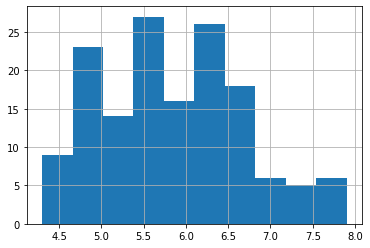

In [71]:
df["SepalLengthCm"].hist()

<AxesSubplot: >

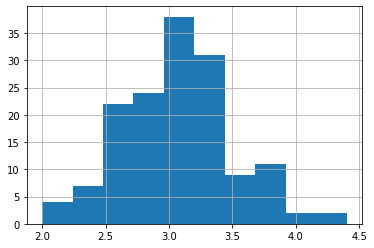

In [72]:
df["SepalWidthCm"].hist()

<AxesSubplot: >

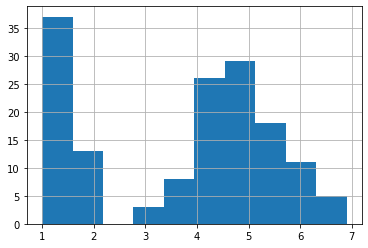

In [73]:
df["PetalLengthCm"].hist()

<AxesSubplot: >

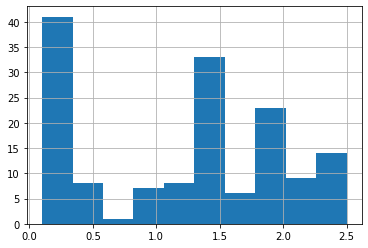

In [74]:
df["PetalWidthCm"].hist()

In [75]:
# Scatterplot
colors=["red","orange","blue"]
species=["Iris-setosa" ,"Iris-versicolor" ,"Iris-virginica"]

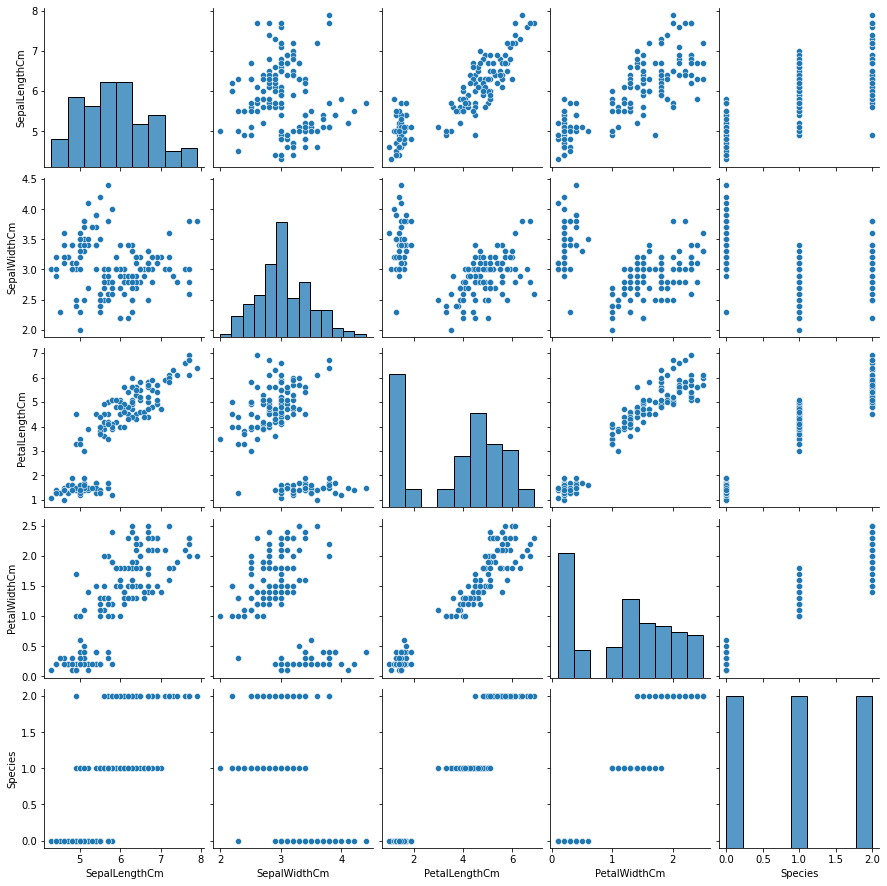

In [76]:
sns.pairplot(df)

# 5. Feature selection

In [77]:
# 1. linearity-- df.corr()
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


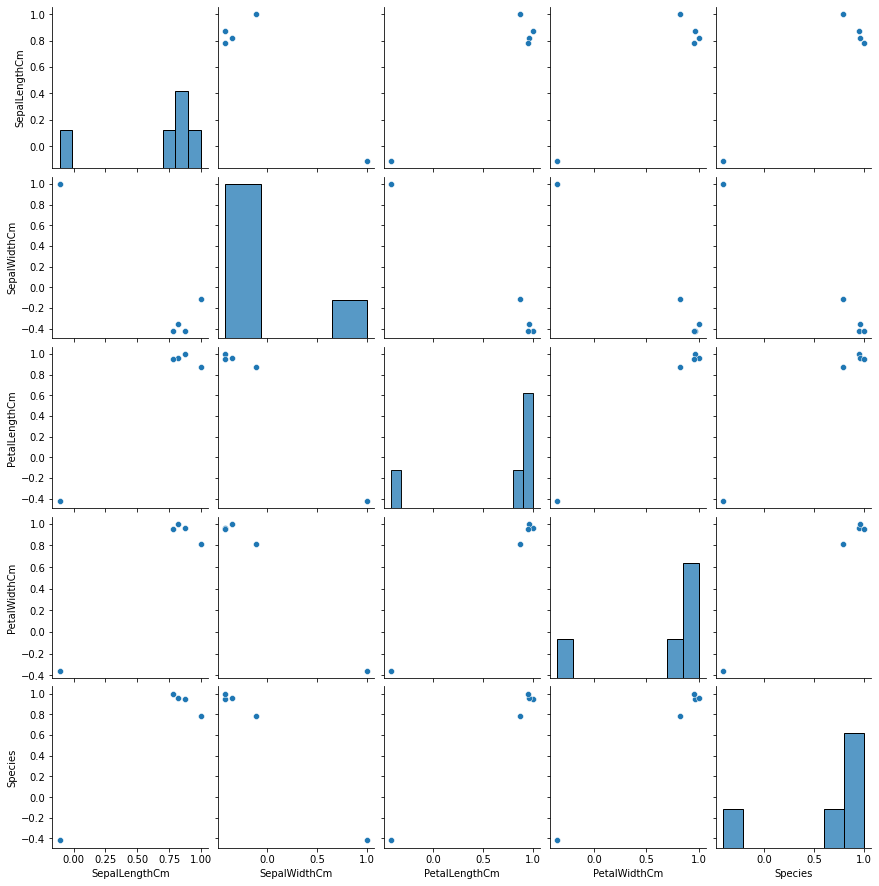

In [78]:
sns.pairplot(df.corr())

In [79]:
# 2. No multiocolinearity:- check by VIF

In [80]:
# 1. drop target column. i.e. species
# 2. convert dataframe into array

x= df.drop ("Species",axis=1)
variance_inflation_factor(x.to_numpy(),1)

97.1116058338033

In [81]:
vif_list =[]
for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.to_numpy(),i)
        vif_list.append(vif)
    
vif_list 

[264.7457109493044, 97.1116058338033, 173.96896536339727, 55.48868864572551]

# 6.Model Training

### 6.1 Split the data into Train and Test Datasets

In [82]:
x = df.drop("Species",axis=1)
y = df["Species"]

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34,shuffle = True)

In [84]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
120,6.9,3.2,5.7,2.3
25,5.0,3.0,1.6,0.2
47,4.6,3.2,1.4,0.2
51,6.4,3.2,4.5,1.5
24,4.8,3.4,1.9,0.2
...,...,...,...,...
35,5.0,3.2,1.2,0.2
68,6.2,2.2,4.5,1.5
85,6.0,3.4,4.5,1.6
105,7.6,3.0,6.6,2.1


In [85]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
97,6.2,2.9,4.3,1.3
149,5.9,3.0,5.1,1.8
27,5.2,3.5,1.5,0.2
60,5.0,2.0,3.5,1.0
138,6.0,3.0,4.8,1.8
55,5.7,2.8,4.5,1.3
10,5.4,3.7,1.5,0.2
32,5.2,4.1,1.5,0.1
86,6.7,3.1,4.7,1.5
67,5.8,2.7,4.1,1.0


In [86]:
y_train

120    2
25     0
47     0
51     1
24     0
      ..
35     0
68     1
85     1
105    2
122    2
Name: Species, Length: 120, dtype: int64

In [87]:
y_test

97     1
149    2
27     0
60     1
138    2
55     1
10     0
32     0
86     1
67     1
12     0
78     1
7      0
82     1
33     0
94     1
26     0
40     0
52     1
126    2
3      0
65     1
50     1
108    2
46     0
54     1
64     1
22     0
56     1
53     1
Name: Species, dtype: int64

In [88]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [89]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)


LogisticRegression()

# 7.Model Evaluation

In [90]:
#Testing Data evaluation
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confussion Matrix:\n",cnf_matrix)
print("*"*80)



accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print("classification_report:\n",clf_report)

Confussion Matrix:
 [[11  0  0]
 [ 0 15  0]
 [ 0  0  4]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         4

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [91]:
#Training Data evaluation
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confussion Matrix:\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)
print("*"*80)
clf_report = classification_report(y_train,y_pred_train)
print("classification_report:\n",clf_report)

Confussion Matrix:
 [[39  0  0]
 [ 0 32  3]
 [ 0  1 45]]
********************************************************************************
Accuracy : 0.9666666666666667
********************************************************************************
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.91      0.94        35
           2       0.94      0.98      0.96        46

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [92]:
import pickle

In [93]:
with open("Loistic_clf.pkl",'wb') as f:
    pickle.dump(logistic_model,f)

In [94]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
97,6.2,2.9,4.3,1.3
149,5.9,3.0,5.1,1.8
27,5.2,3.5,1.5,0.2
60,5.0,2.0,3.5,1.0
138,6.0,3.0,4.8,1.8


In [95]:
filename="Loistic_clf.pkl"

In [96]:
load_model=pickle.load(open(filename,"rb"))

In [97]:
load_model.predict([[6.2,2.9,4.3,1.3]])

array([1], dtype=int64)